In [1]:
# data wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# additional lib
import function as fn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 2000)

In [2]:
# Model Algorithm (modeling)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import statsmodels.api as sm

# Data Preparation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# pycaret
import pycaret

In [3]:
df = pd.read_csv('D:\PURWADHIKA\PLAYGROUND\PYTHON\Modul 3\Capstone\Saudi Arabia Used Cars\data\processed\clean_data.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
3735,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
3736,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
3737,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
3738,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


<Axes: xlabel='Price', ylabel='Density'>

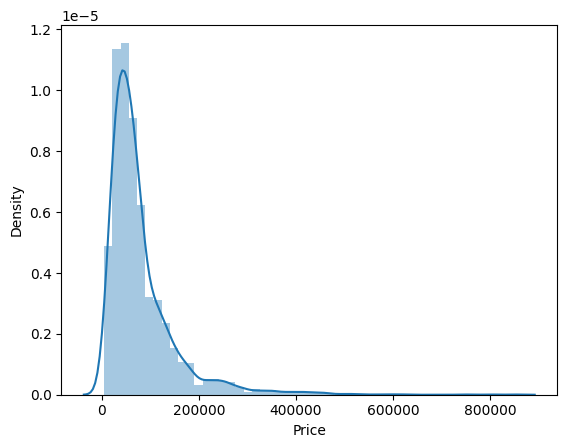

In [4]:
sns.distplot(df['Price'])

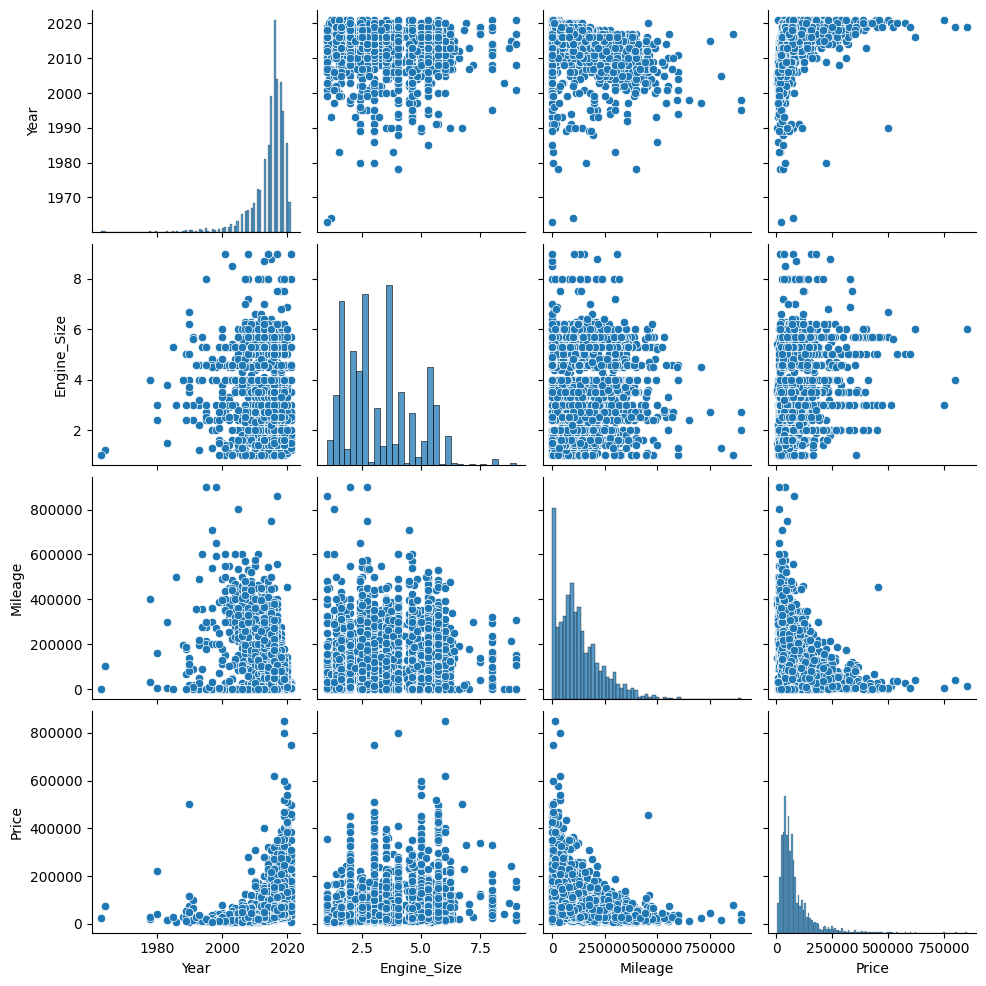

In [5]:
sns.pairplot(df)

In [6]:
df = df[df['Price'] > 4658]

<Axes: xlabel='Price', ylabel='Density'>

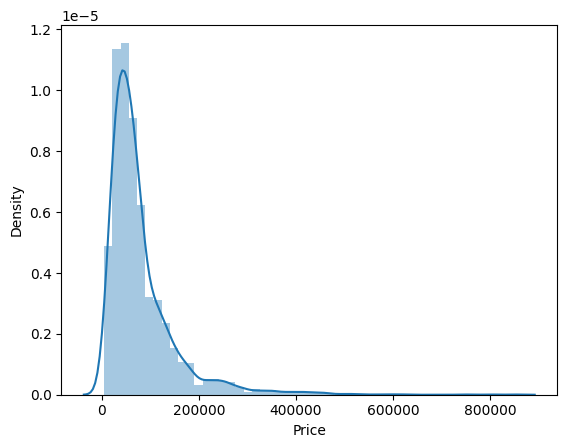

In [7]:
sns.distplot(df['Price'])

In [8]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,3740.000000,3740.000000,3740.000000,3740.000000
mean,2014.829679,3.187567,128656.366578,79613.078342
std,5.075427,1.461262,110962.314844,72728.051902
min,1963.000000,1.000000,100.000000,5000.000000
25%,2013.000000,2.000000,49000.000000,36500.000000
50%,2016.000000,2.700000,104000.000000,59000.000000
75%,2018.000000,4.000000,183000.000000,95000.000000
max,2021.000000,9.000000,900000.000000,850000.000000


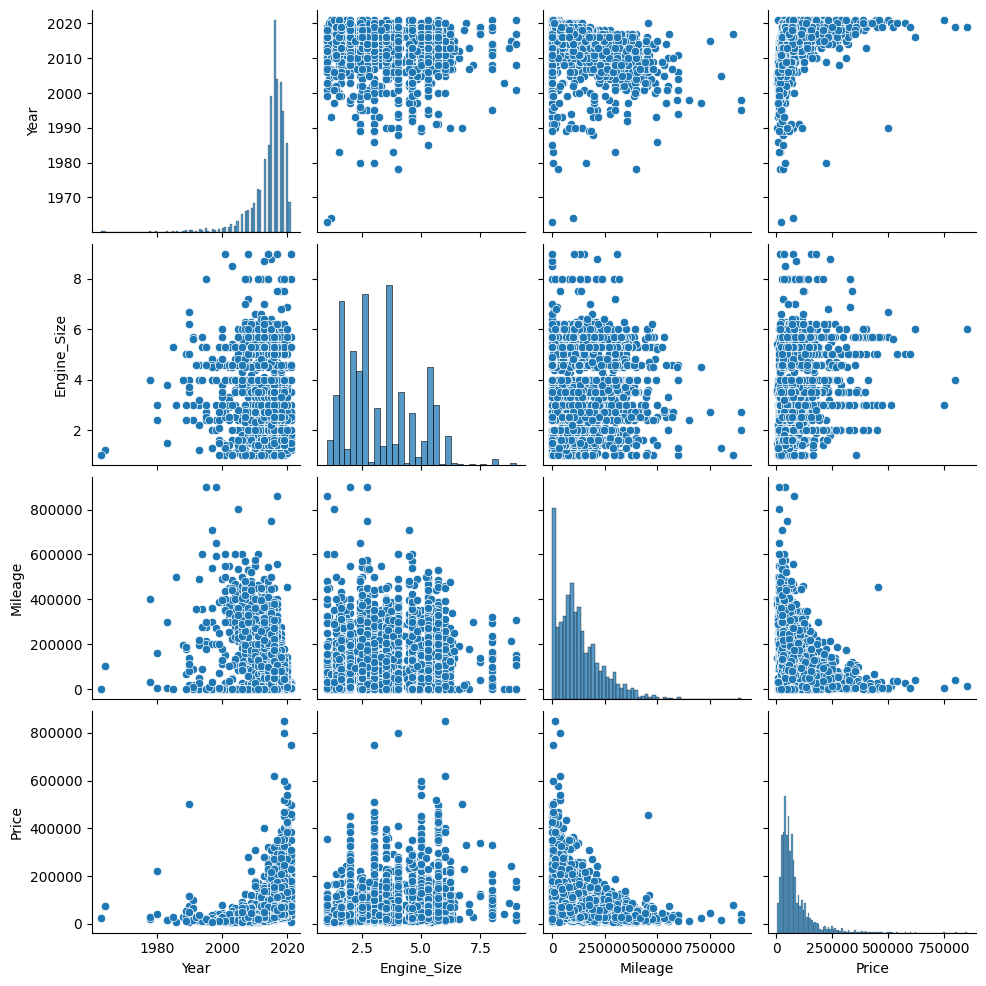

In [9]:
sns.pairplot(df)

In [10]:
cat = df.select_dtypes(include=object).columns

for col in cat:
    t = df[col].value_counts().to_frame().reset_index()
    t['%'] = t['count']/t['count'].sum()*100
    t['cum %'] = t['%'].cumsum()
    display(t)

,Type,count,%,cum %
0,Accent,146,3.903743,3.903743
1,Land Cruiser,146,3.903743,7.807487
2,Camry,145,3.877005,11.684492
3,Hilux,117,3.128342,14.812834
4,Sonata,109,2.914439,17.727273
...,...,...,...,...
312,A4,1,0.026738,99.893048
313,Tiggo,1,0.026738,99.919786
314,Envoy,1,0.026738,99.946524
315,Ertiga,1,0.026738,99.973262


,Region,count,%,cum %
0,Riyadh,1590,42.513369,42.513369
1,Dammam,747,19.973262,62.486631
2,Jeddah,534,14.278075,76.764706
3,Al-Medina,122,3.262032,80.026738
4,Qassim,109,2.914439,82.941176
5,Al-Ahsa,109,2.914439,85.855615
6,Aseer,84,2.245989,88.101604
7,Makkah,80,2.139037,90.240642
8,Khobar,49,1.310160,91.550802
9,Tabouk,49,1.310160,92.860963


,Make,count,%,cum %
0,Toyota,873,23.342246,23.342246
1,Hyundai,489,13.074866,36.417112
2,Ford,340,9.090909,45.508021
3,Chevrolet,286,7.647059,53.155080
4,Nissan,249,6.657754,59.812834
5,Kia,178,4.759358,64.572193
6,Mercedes,173,4.625668,69.197861
7,GMC,165,4.411765,73.609626
8,Lexus,146,3.903743,77.513369
9,Mazda,91,2.433155,79.946524


,Gear_Type,count,%,cum %
0,Automatic,3345,89.438503,89.438503
1,Manual,395,10.561497,100.000000


,Origin,count,%,cum %
0,Saudi,2823,75.481283,75.481283
1,Gulf Arabic,490,13.101604,88.582888
2,Other,411,10.989305,99.572193
3,Unknown,16,0.427807,100.000000


,Options,count,%,cum %
0,Full,1448,38.716578,38.716578
1,Standard,1296,34.652406,73.368984
2,Semi Full,996,26.631016,100.000000


In [11]:
# data spliting

train, test = train_test_split(
    df,
    test_size = 0.20,
    random_state = 7
)

print(train.shape, test.shape)

(2992, 10) (748, 10)


In [12]:
# setup
from pycaret.regression import *

setup(
    # general setup
    data=train,
    target='Price', 
    train_size=0.9,
    verbose=True,

    # data wrangling
    preprocess=True,
    # encoding_method=ce.BinaryEncoder(),
    
    # # feature selection
    ignore_features=['Region', 'Origin']
)

,Description,Value
0,Session id,6860
1,Target,Price
2,Target type,Regression
3,Original data shape,"(2992, 10)"
4,Transformed data shape,"(2992, 10)"
5,Transformed train set shape,"(2692, 10)"
6,Transformed test set shape,"(300, 10)"
7,Ignore features,2
8,Ordinal features,1
9,Numeric features,3


In [13]:
get_config('dataset_transformed')

,Type,Make,Gear_Type,Options_Semi Full,Options_Full,Options_Standard,Year,Engine_Size,Mileage,Price
1456,84138.560230,80957.283142,0.0,1.0,0.0,0.0,2020.0,4.0,40000.0,132000
2235,81945.403487,75348.917059,0.0,0.0,1.0,0.0,2007.0,4.7,300000.0,35000
2916,32131.380750,45141.794118,0.0,0.0,0.0,1.0,2020.0,1.4,2600.0,45000
3494,81945.403487,75348.917059,0.0,0.0,0.0,1.0,2018.0,5.3,92736.0,146500
1882,129689.686556,167066.163932,0.0,0.0,1.0,0.0,2016.0,2.2,95000.0,127000
...,...,...,...,...,...,...,...,...,...,...
2918,75897.654053,66090.800229,0.0,0.0,1.0,0.0,2020.0,1.8,46000.0,62000
1523,104891.080071,99568.063017,0.0,0.0,1.0,0.0,2009.0,3.6,277000.0,42000
1321,79599.961367,79599.961367,0.0,0.0,0.0,1.0,2021.0,1.5,4175.0,42500
2278,73810.550814,43918.821137,0.0,1.0,0.0,0.0,2017.0,3.8,77000.0,58000


In [14]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\ariad\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Year', 'Engine_Size', 'Mileage'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Type', 'Make', 'Gear_Type',
                                             'Options'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_en...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Automatic    0
Manual       1
NaN         -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Options'],
                                    transformer=OneHotEncoder(cols=['Options'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Type', 'Make'],
                                    transformer=TargetEncoder(cols=['Type',
                                                                    'Make'],
                                                              handle_missing='return_nan')))])

In [15]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14268.8894,991621870.3318,30837.6822,0.8171,0.2884,0.2165,0.6180
gbr,Gradient Boosting Regressor,15574.3260,1037834861.3750,31589.0049,0.8078,0.3257,0.2465,0.5420
xgboost,Extreme Gradient Boosting,14400.9483,1080483667.2847,32368.4662,0.7997,0.2954,0.2147,0.6290
et,Extra Trees Regressor,14031.9909,1105292961.6851,32384.8852,0.7958,0.2964,0.2209,0.6410
rf,Random Forest Regressor,15103.5412,1219444754.9204,34217.5767,0.7739,0.3079,0.2298,0.7090
dt,Decision Tree Regressor,18769.7255,1658293834.7614,40074.2026,0.6930,0.3760,0.2802,0.5190
ada,AdaBoost Regressor,34562.8812,2159314822.7511,46082.0846,0.6007,0.6519,0.8242,0.5230
llar,Lasso Least Angle Regression,25777.3545,2240204134.6517,46996.8653,0.5850,0.5881,0.5299,0.6420
lar,Least Angle Regression,25777.8197,2240197488.6664,46996.8033,0.5850,0.5884,0.5299,0.5660
ridge,Ridge Regression,25776.5334,2240228110.7478,46997.0976,0.5850,0.5872,0.5299,0.5480


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=6860)

In [16]:
model = create_model('lightgbm', return_train_score=True)
model

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=6860)

In [17]:
predict_model(estimator=model, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,13559.0481,675930069.1870,25998.6551,0.8534,0.3030,0.2055


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price,prediction_label
1114,FJ,Riyadh,Toyota,Automatic,Gulf Arabic,Full,2017,1.6,74658,135000,111288.506009
2719,Hilux,Dammam,Toyota,Manual,Saudi,Standard,2016,2.7,165000,63000,67824.048378
616,RX,Dammam,Lexus,Automatic,Other,Full,2017,3.5,81000,165000,166744.825172
789,Accord,Jeddah,Honda,Automatic,Saudi,Full,2017,3.5,25400,90000,87389.900362
3421,Land Cruiser,Riyadh,Toyota,Automatic,Gulf Arabic,Full,2016,5.7,216000,151000,185379.221676
...,...,...,...,...,...,...,...,...,...,...,...
1395,VTC,Dammam,Nissan,Manual,Saudi,Standard,2009,4.0,54000,42000,40511.549279
3375,Blazer,Khobar,Chevrolet,Automatic,Gulf Arabic,Semi Full,2017,3.6,115000,63000,61934.987083
3427,F150,Dammam,Ford,Automatic,Saudi,Semi Full,2017,5.0,53000,140000,111360.415281
600,Sierra,Riyadh,GMC,Automatic,Saudi,Full,2016,5.3,82576,120000,133859.954270


In [18]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…